# Anomaly Detection (Anomali Tespiti)

ƒ∞lk ba≈üta anomalinin tanƒ±mƒ±nƒ± yaparak ba≈ülayalƒ±m. Anomali, TDK'ye g√∂re **norm dƒ±≈üƒ±, alƒ±≈üƒ±lmadƒ±k, beklenmedik** anlamlarƒ±na gelmektedir.

Anomaly Detection (Anomali Tespiti) ise basit anlamƒ±yla bir veride beklenmedik durumlarƒ±n veya kalƒ±plarƒ±n bulunmasƒ±nƒ± saƒülayan bir tekniktir. Bu beklenmedik durumlar veya kalƒ±plar aslƒ±nda bir verinin beklenen davranƒ±≈ülarƒ±na uymayan durumlar veya kalƒ±plardƒ±r. Bu beklenmedik durumlara literat√ºrde outliers (aykƒ±rƒ± deƒüerler), exceptions (istisnai durumlar) veya anomaliler denilmektedir. 

√ñrnek vermek gerekirse 10 ya≈üƒ±ndaki bir √ßocuƒüun sigara i√ßmesi bir anomali durumudur.

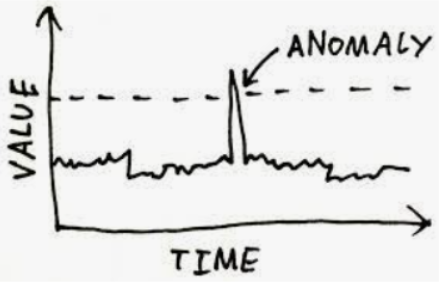

Anomali tespitini nasƒ±l ger√ßekle≈ütirebiliriz? Tabi ki bunun i√ßin bir √ßok y√∂ntem var ben ba≈ülƒ±ca y√∂ntemleri ele alacaƒüƒ±m. 

Anomali tespiti tekli ve √ßoklu olmak √ºzere iki grupta inceleyeceƒüiz. <br>

**1. Tekli Anomali Tespiti:**  <br>
Deƒüi≈ükenleri teker teker inceleyerek her birindeki anomali durumlarƒ±na bakar. Ba≈ülƒ±ca kullanƒ±lan y√∂ntemlerin ikisine bakacak  olursak:<br> <br>
**a) IQR ƒ∞le Anomali Tespiti** <br>
**b) 3 Sigma Kurali ƒ∞le Anomali Tespiti** <br> <br> <br>

**2. √áoklu Anomali Tespiti** <br>
    Deƒüi≈ükenleri bir arada deƒüerlendirerek aralarƒ±ndaki il≈ükiye g√∂re anomali durumlarƒ±na bakar. Ba≈ülƒ±ca kullanƒ±lan y√∂ntemlerin       ikisine bakacak olursak: <br> <br>
    **a) Local Outlier Factor (LOF)** <br>
    **b) Isolation Forest**

## 1) Tekli Anomali Tespiti

Tekli Anomali Tespiti, bir veri seti √ºzerinden anlatacak olursak. Veri setindeki herhangi bir n√ºmerik deƒüi≈ükendeki deƒüerlerin **daƒüƒ±lƒ±msal olarak** belli y√∂ntemler dahilinde anomali verileri tespit etmemizi saƒülar.

### a) IQR ƒ∞le Anomali Tespiti

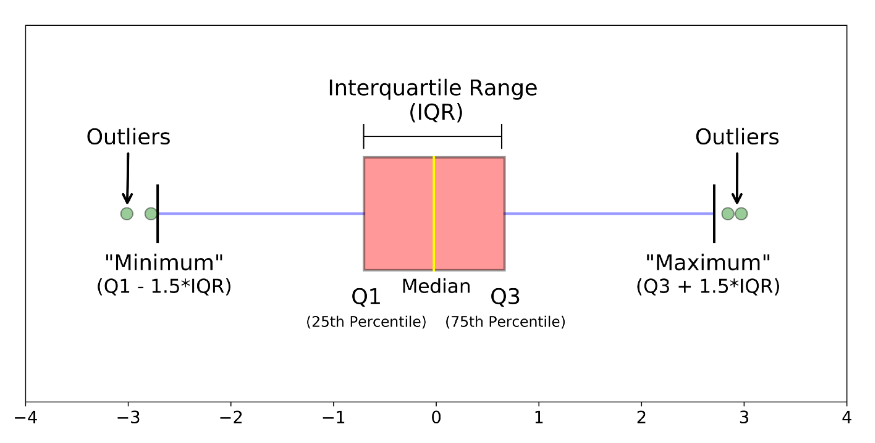
 
Aykƒ±rƒ± bulma i≈üleminde yapƒ±lan i≈ülemin aynƒ±sƒ± ger√ßekle≈ütirilir. Temel form√ºllerden bahsetmek gerekirse:

IQR = Q3 - Q1 

Alt sƒ±nƒ±r = Q1 - 1.5 * IQR

√úst sƒ±nƒ±r = Q3 + 1.5 * IQR

√úst sƒ±nƒ±rƒ±n √ºst√ºnde ve alt sƒ±nƒ±rƒ±n altƒ±nda olan deƒüerler aykƒ±rƒ± veya anomali deƒüer olarak kabul edilmektedir. Peki bu form√ºlleri neye g√∂re yazdƒ±k biraz bunun √ºst√ºne d√º≈üelim. 

Biliyoruz ki Gaussian daƒüƒ±lƒ±mƒ± ≈üu ≈üekildedir:

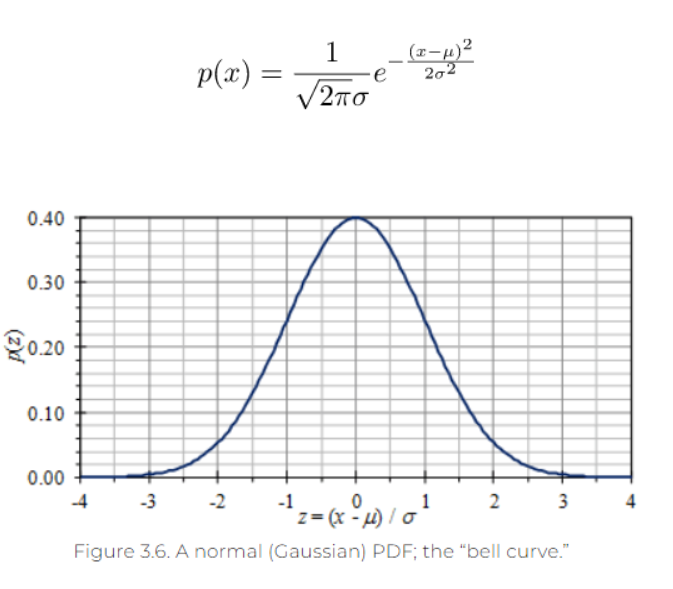


IQR y√∂ntemini kendimizin √ºrettiƒüi ve dƒ±≈üardan alƒ±nan bir veri setinin bir deƒüi≈ükeninde deneyerek neler deƒüi≈ütirdiƒüini inceleyelim.

K√ºt√ºphanelerimizi tanƒ±mlayarak ba≈ülayalƒ±m.

In [2]:
import pandas as pd 
import numpy as np 
import random 
import matplotlib.pyplot as plt 
import seaborn as sns
import anomaly_detection_methods as adm

import warnings 
warnings.filterwarnings('ignore')

`WineQT` adƒ±nda bir veri seti kullanacaƒüƒ±z. Bu veri seti ≈üaraplarƒ±n kalite kontr√ºl√º test etmek amacƒ±yla yapƒ±lmƒ±≈ü bir veri setidir. Tekli anomali analizinde bu veri setinin `chlorides` deƒüi≈ükenini kullanacaƒüƒ±z. 

In [3]:
df = pd.read_csv('./WineQT.csv')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

Anomali deƒüerleri g√∂rselle≈ütirerek g√∂relim. Daƒüƒ±lƒ±mƒ± g√∂zlemleyelim.

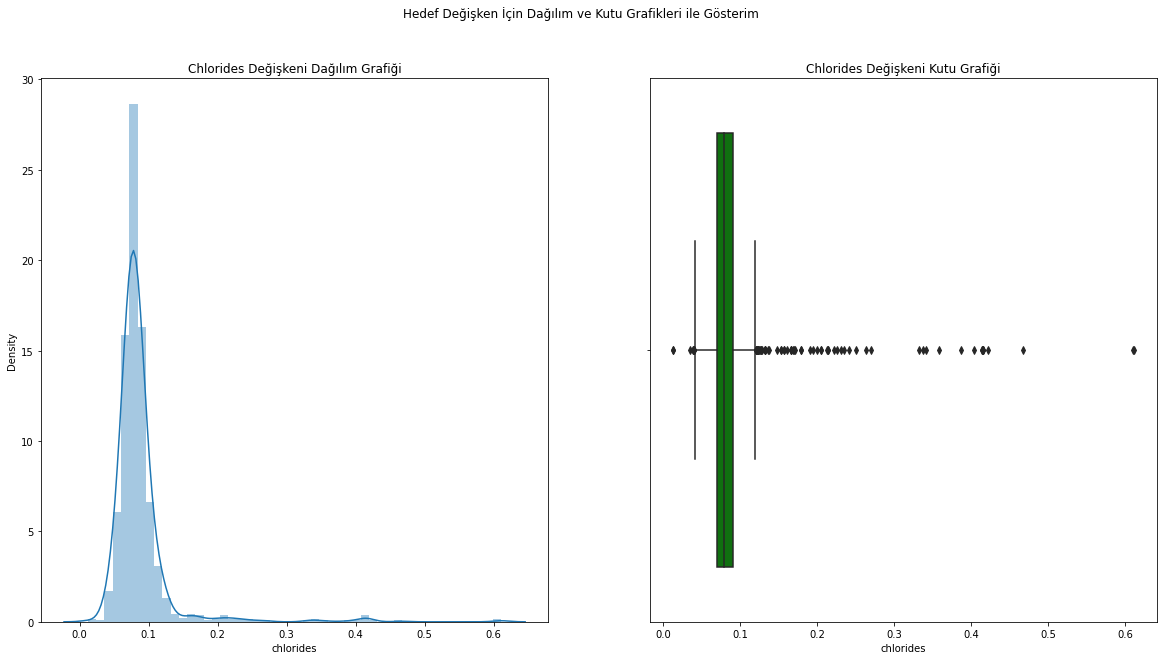

In [11]:
plt.subplots(1,2,figsize = (20,10))
plt.suptitle("Hedef Deƒüi≈üken ƒ∞√ßin Daƒüƒ±lƒ±m ve Kutu Grafikleri ile G√∂sterim")

plt.subplot(121)
plt.title("Chlorides Deƒüi≈ükeni Daƒüƒ±lƒ±m Grafiƒüi")
sns.distplot(df['chlorides']);

plt.subplot(122)
plt.title("Chlorides Deƒüi≈ükeni Kutu Grafiƒüi")
sns.boxplot(df['chlorides'], color = 'green')
plt.show()

Verinin istatistiksel bilgilerini g√∂sterelim.

In [12]:
data_s = df['chlorides']
data_s.describe()

count    1143.000000
mean        0.086933
std         0.047267
min         0.012000
25%         0.070000
50%         0.079000
75%         0.090000
max         0.611000
Name: chlorides, dtype: float64

Standard Sapma Deƒüerlerini G√∂sterelim

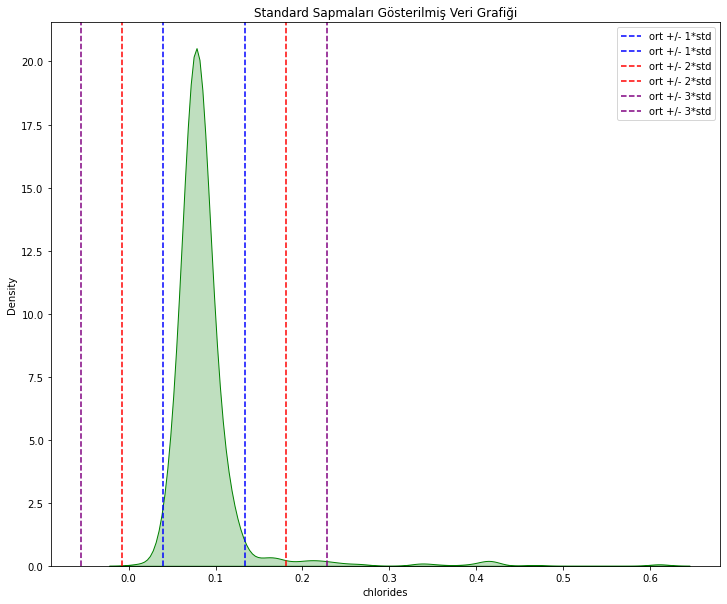

In [68]:
plt.figure(figsize =(12,10))
plt.title("Standard Sapmalarƒ± G√∂sterilmi≈ü Veri Grafiƒüi")
plt.axvline(x = df['chlorides'].std()+ df['chlorides'].mean(), c = "b", linestyle ='--')
plt.axvline(x = -df['chlorides'].std()+ df['chlorides'].mean(), c = "b", linestyle ='--')
plt.axvline(x = 2*df['chlorides'].std()+ df['chlorides'].mean(), c = "r", linestyle ='--')
plt.axvline(x = -2*df['chlorides'].std()+ df['chlorides'].mean(), c = "r", linestyle ='--')
plt.axvline(x = 3*df['chlorides'].std()+ df['chlorides'].mean(), c = "purple", linestyle ='--')
plt.axvline(x = -3*df['chlorides'].std()+ df['chlorides'].mean(), c = "purple", linestyle ='--')
sns.kdeplot(df['chlorides'], fill = True,  color = 'g')
plt.legend(['ort +/- 1*std','ort +/- 1*std','ort +/- 2*std','ort +/- 2*std','ort +/- 3*std','ort +/- 3*std'],loc = 'best')
plt.show();

≈ûimdi ise verimize IQR ile anomali tespiti i≈ülemini uygulayalƒ±m ve alt ve √ºst sƒ±nƒ±rlarƒ±nƒ± belirleyelim.

In [14]:
lower_bound_iqr, upper_bound_iqr = adm.anomaly_detection_with_IQR(df['chlorides'], 1.5)

Anomaly Detection precess with finding IQR started
Cofficent: 1.5
Low Edge: 0.04000000000000002
Upper Edge: 0.11999999999999998
Anomaly detection process with finding IQR finished succesfully.


In [15]:
iqr_anomaly_data =  df[(df['chlorides'] < lower_bound_iqr) | (df['chlorides'] > upper_bound_iqr)]['chlorides'].count()
print("IQR ile √ñl√ß√ºlm√º≈ü Anomali Deƒüerler:",iqr_anomaly_data)

IQR ile √ñl√ß√ºlm√º≈ü Anomali Deƒüerler: 77


Alt ve √ºst sƒ±nƒ±rlarƒ±mƒ±zƒ± aldƒ±ƒüƒ±mƒ±za g√∂re bir de daƒüƒ±lƒ±m √ºzerinde g√∂relim.

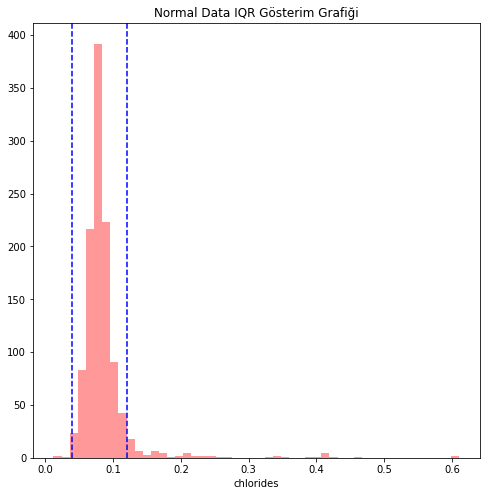

In [109]:
plt.figure(figsize = (8,8))
plt.title("Normal Data IQR G√∂sterim Grafiƒüi")
plt.axvline(x = lower_bound_iqr, c = "b", linestyle ='--')
plt.axvline(x = upper_bound_iqr, c = "b", linestyle ='--')
sns.distplot(df['chlorides'], kde = False,  color = 'r')
plt.show()

### b) 3 Sigma Kuralƒ± ƒ∞le Anomali Tespiti

Adƒ±ndan da anla≈üƒ±lacaƒüƒ± √ºzere 3 sigma kuralƒ± 3 standart sapma aralƒ±ƒüƒ± dƒ±≈üƒ±ndaki verileri anomali deƒüer olarak kabul eder. 

Bu grafiƒüi standart sapma (ùúé) deƒüerleri √ºzerinden inceleyecek olursak:

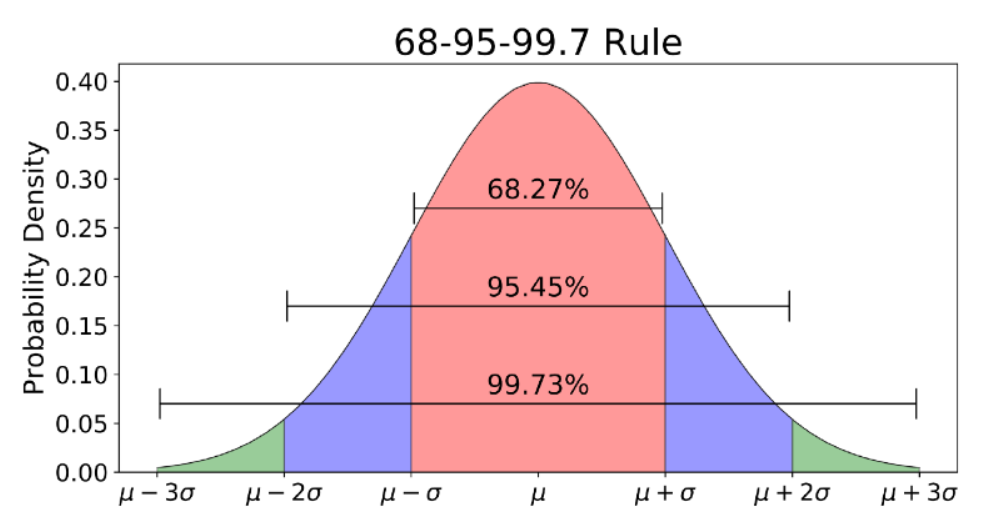

g√∂r√ºld√ºƒü√º √ºzere 68-95-99.7 kuralƒ± mevcuttur. Bu kural ilk standart sapma(ùúé) aralƒ±ƒüƒ± toplam daƒüƒ±lƒ±mƒ±n %68'ini, iki standard sapma (2ùúé) aralƒ±ƒüƒ± toplam daƒüƒ±lƒ±m %95'ini ve √º√ß standart sapma aralƒ±ƒüƒ± ise toplam daƒüƒ±lƒ±mƒ±n %99.7'sini olu≈üturmaktadƒ±r. 
Daƒüƒ±lƒ±mda genellikle √º√ß standard sapma aralƒ±ƒüƒ± (%97) dƒ±≈üƒ±ndaki veriler anomali deƒüer varsayƒ±lmaktadƒ±r. 


3 Sigma Kuralƒ±nƒ± IQR tarafƒ±nda kullandƒ±ƒüƒ±mƒ±z veride uygulayalƒ±m ve sonu√ßlarƒ± g√∂zlemleyelim.

In [16]:
lower_bound_sigma, upper_bound_sigma = adm.three_sigma(df['chlorides'].values)

Three Sigma process started.
Three Sigma precess completed successfully
Low Edge: -0.054807336235643156
Upper Edge: 0.22867260307728793


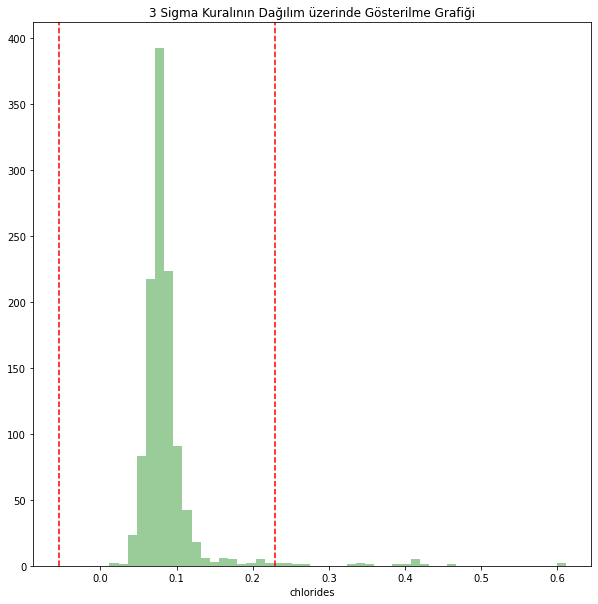

In [85]:
plt.figure(figsize = (10,10))
plt.title("3 Sigma Kuralƒ±nƒ±n Daƒüƒ±lƒ±m √ºzerinde G√∂sterilme Grafiƒüi")
plt.axvline (x = lower_bound_sigma, linestyle = '--', c = "r")
plt.axvline (x = upper_bound_sigma, linestyle = '--', c = "r")
sns.distplot(df['chlorides'],kde = False, color = 'g')
plt.show();

### IQR ile 3 Sigma Kar≈üƒ±la≈ütƒ±rma

In [92]:
comp_df = pd.DataFrame()
comp_df['Values'] = df['chlorides']
comp_df['IQR Anomali'] = 0
comp_df['3 Sigma Anomali'] = 0
comp_df

Values  IQR Anomali  3 Sigma Anomali
0      0.076            0                0
1      0.098            0                0
2      0.092            0                0
3      0.075            0                0
4      0.076            0                0
...      ...          ...              ...
1138   0.076            0                0
1139   0.068            0                0
1140   0.090            0                0
1141   0.062            0                0
1142   0.075            0                0

[1143 rows x 3 columns]

In [96]:
iqr_anomaly_index = df[(df['chlorides'] < lower_bound_iqr) | (df['chlorides'] > upper_bound_iqr)].index
sigma_anomaly_index = df[(df['chlorides'] < lower_bound_sigma) | (df['chlorides'] > upper_bound_sigma)].index

comp_df.loc[iqr_anomaly_index, 'IQR Anomali'] = 1
comp_df.loc[sigma_anomaly_index, '3 Sigma Anomali'] = 1

G√∂rselle g√∂stererek destekleyelim.

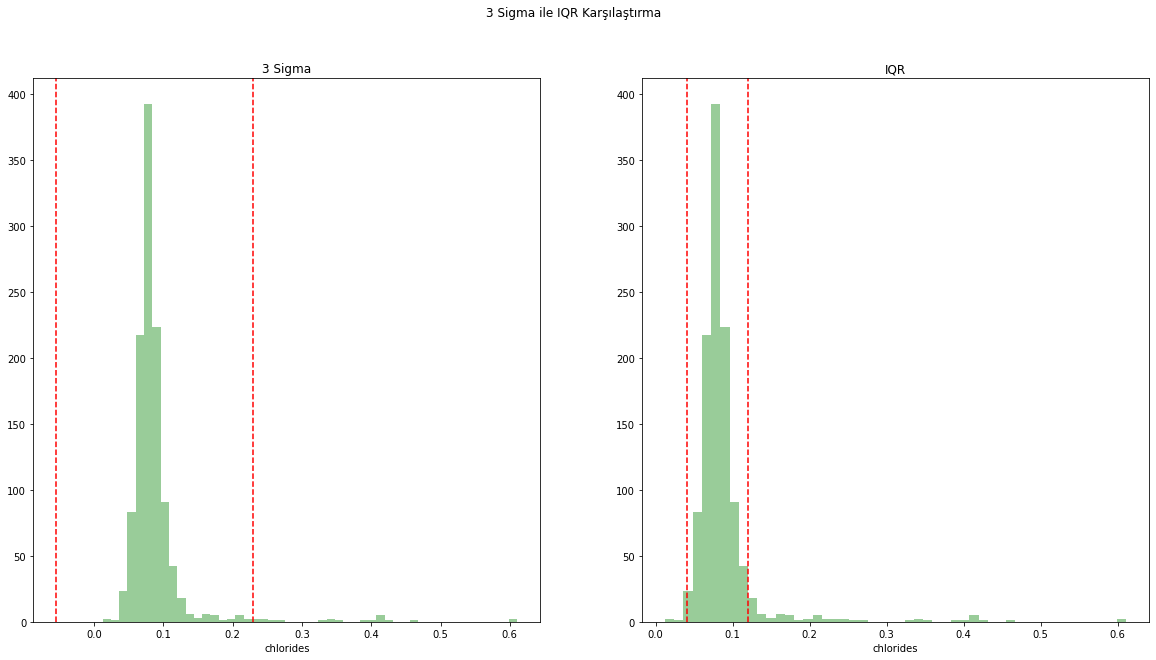

In [114]:
fig,ax = plt.subplots(1,2,figsize = (20,10))
fig.suptitle("3 Sigma ile IQR Kar≈üƒ±la≈ütƒ±rma")

plt.subplot(121)
plt.title("3 Sigma")
plt.axvline (x = lower_bound_sigma, linestyle = '--', c = "r")
plt.axvline (x = upper_bound_sigma, linestyle = '--', c = "r")
sns.distplot(df['chlorides'],kde = False, color = 'g')

plt.subplot(122)
plt.title("IQR")
plt.axvline(x = lower_bound_iqr, c = "r", linestyle ='--')
plt.axvline(x = upper_bound_iqr, c = "r", linestyle ='--')
sns.distplot(df['chlorides'], kde = False,  color = 'g')
plt.show()